<div style="text-align: center">

# Statistiques descriptives et découverte des données
## _Business Intelligence, Data analysis and vizualization_
    
$$\Large_{*}{}^{*}{}_{*}$$
    
</div>

Bienvenue sur **Jupyter Notebook** ! Avant de commencer, veillez à bien lire le document qui accompagne ce tutoriel. 

Le but de cette séance va être de découvrir ce nouvel environnement de travail et de l'appliquer à votre Projet décisonnel. Le tutoriel sera réalisé en Python 🐍 mais ne nécessite pas de connaissances avancées du langage. 

Ce tutoriel a pour but de:

- Vous aider à charger des données et apprendre à les manipuler afin de réaliser des pré-traitements. 
- Dresser des statistiques descriptives simples, de premier niveau, qui serviront à la compréhension métier mais aussi à vérifier la qualité de vos données. 

_Il s'agit d'une introduction pour vous aider dans la mise en place des données dans le cadre de votre projet décisionnel. Une séance plus complète dédiée à la manipulation, l'analyse statistique et la production de moyens de visualisation sera effectuée en TP de Statistiques avancées._

## Table des matières

[1. Les dataframes](#1)
>
> [1.1 Chargement des données](#1-1)
>
> [1.2 Premières manipulation](#1-2)
>
> [1.3 Manipulation de table](#1-3)
>
[2. Statistiques élémentaires](#2)
>
> [2.1 Typage des données](#2-1)
> 
> [2.2 Premières analyses univariées](#2-3)
> 
> [2.3 Premières analyses bivariées](#2-3)

# Les dataframes<a class="anchor" id="1"></a>

### Chargement des données<a class="anchor" id="1-1"></a>

_**Il vous est conseillé, si vous le pouvez, d'utiliser lors de cette séance vos sources de données de Projet. Si vous n'en disposez pas, vous pouvez utiliser le fichier .csv disponible dans ce répertoire**_ `titanic.csv`.

Le fichier `titanic.csv` répertorie différents passagers à bord du célèbre paquebot lors du drame de la nuit du 14 Avril 1912. 

Les colonnes possèdent la description suivante:

|Colonne|Description|Value|
|-------|-----------|-----|
|`PassengerId`|Id du passager|Int|
|`Survived`|Boolean si le passager a survécu au naufrage|{0,1}|
|`Pclass`|Classe du passager (1er = 1, ...) |{1,2,3}|
|`Name`|Identité du passager|String|
|`Sex`|Sexe du passager|{male, female}|
|`Age`|Âge du passager|Double|
|`SibSp`|Nombre de frères, soeurs ou conjoint à bord|Int|
|`Parch`|Nombre d'enfants ou parents à bord|Int|
|`Ticket`|Numéro de ticket|Int|
|`Fare`|Prix du ticket|Double|
|`Cabin`|Numéro de cabine|String|
|`Embarked`|Port d'embarquement (C = Cherbourg; Q = Queenstown; S = Southampton)|{C,Q,S}|

In [332]:
# Importations
import pandas as pd
import numpy as np

# path = ""
path = './'
df = pd.read_csv(path + 'titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Si la table a été modifiée et que l'on souhaite conserver les nouvelles données, on peut exporter le dataframe au format `.csv` à l'aide de la commande:
> `df.to_csv(r"_path_", index=False)`

### Premières manipulations<a class="anchor" id="1-2"></a>

Soit `df` un dataframe donné, on donne la liste des commandes élémentaires suivantes:

- Nombre de ligne et colonnes: `df.shape[0]` (nb lignes) ; `df.shape[1]` (nb colonnes) 
- Noms des colonnes: `df.columns.values`


- **Accès aux données**: 
    + Accès à la ligne $i$: `df.iloc[i,:]`
    + Accès à la colonne $j$: `df.iloc[:,j]`
    + Accès à la ligne $i$, colonne $j$: `df.iloc[i,j]`
    + Accès à la colonne de nom $n$: `df['n']` ou `df.n`
    + Accès à la colonne de nom $n$, ligne $i$: `df['n'][i]` ou `df.n[i]`
    
    
- Tri de la colonne $n$: `df['n'].sort_values()`
- Tri du dataframe selon la colonne $n$: `df.sort_values(by='n')`

#### Exercices

Tester les commandes suivantes sur le fichier `titanic.csv` et décrire leur fonctionnement.

In [333]:
df[['Sex','Age']].head()

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


In [334]:
df['Survived'][1:3]

1    1
2    1
Name: Survived, dtype: int64

In [335]:
df.iloc[-1,0]

891

In [336]:
df.iloc[df.shape[0]-1,0]

891

In [337]:
df.iloc[0:5,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [338]:
df.iloc[0:5,[0,2,4]]

,PassengerId,Pclass,Sex
0,1,3,male
1,2,1,female
2,3,3,female
3,4,1,female
4,5,3,male


- Supression la ligne $i$: `df.drop([i])`
- Supression la colonne $j$: `df.drop([j], axis = 1)`
- Supression des lignes avec des valeurs nulles: `df.dropna()`

- Filtrage selon une condition $\varphi$: `df.loc[df[phi, :]]`

    Où $\varphi$ est une formule logique exprimée sur les colonnes de $df$ à l'aide des opérateurs booléens `&`(ET), `|` (OU) et `~` (NON). 
    
#### Exemples

In [339]:
# Liste des Femmes sur pacquebot

df.loc[df['Sex']=="female", :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [340]:
# Liste des Hommes de plus de 30 ans sur le pacquebot de 1er et 2nd classes

# On retient les Colonnes Survived, Pclass, Name, Sex, Age
colonnes = ['Survived', 'Pclass', 'Name', 'Sex', 'Age']

df.loc[(df['Sex']=="male") & (df['Age'] >= 30) & (df['Pclass'].isin([1,2])), colonnes]

,Survived,Pclass,Name,Sex,Age
6,0,1,"McCarthy, Mr. Timothy J",male,54.0
20,0,2,"Fynney, Mr. Joseph J",male,35.0
21,1,2,"Beesley, Mr. Lawrence",male,34.0
30,0,1,"Uruchurtu, Don. Manuel E",male,40.0
33,0,2,"Wheadon, Mr. Edward H",male,66.0
...,...,...,...,...,...
817,0,2,"Mallet, Mr. Albert",male,31.0
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0
857,1,1,"Daly, Mr. Peter Denis",male,51.0
867,0,1,"Roebling, Mr. Washington Augustus II",male,31.0


### Manipulation de tables <a class="anchor" id="1-3"></a>

La modification d'une valeur au sein d'un dataframe se fait simplement par ré-affectation comme on pourrait le faire au sein d'une liste ou d'un tableau. 

#### Exercice

Supposons le dataframe `T` crée par la commande suivante:

In [341]:
T = pd.DataFrame({'A': range(1,7), 'B': [2, 10, 9, 0, np.nan, 1], 'C': [1,np.nan]*3})

T

,A,B,C
0,1,2.0,1.0
1,2,10.0,NaN
2,3,9.0,1.0
3,4,0.0,NaN
4,5,NaN,1.0
5,6,1.0,NaN


1. Modifier la valeur située dernière, colonne 1 de `T` par la valeur 10. 

In [342]:
T.iloc[-1,1] = 10

T

,A,B,C
0,1,2.0,1.0
1,2,10.0,NaN
2,3,9.0,1.0
3,4,0.0,NaN
4,5,NaN,1.0
5,6,10.0,NaN


2. On peut détecter si une valeur possède la valeur nulle grâce à la commande `np.isnan()`. Afficher uniquement les lignes de `T` qui ne contiennent pas de valeur nulles `NaN` dans la colonne **C**.

In [343]:
T.loc[~np.isnan(T['C']), :]

,A,B,C
0,1,2.0,1.0
2,3,9.0,1.0
4,5,NaN,1.0


3. La commande `np.where(phi, x, y)` permet de retourner une liste numpy composée de `x` et `y` selon la condition $\varphi$ évaluée. 
    
    Par exemple, `np.where((T['A'] % 2) == 1, 0, df['A'])` retourne `[0, 1, 0, 3, 0, 5]`. 

    Dans la colonne **B**, remplacer toutes les valeurs $\geq$ 5 par la valeur 20.

In [344]:
T['B'] = np.where(T['B'] >= 5, 20, T['B'])

T

,A,B,C
0,1,2.0,1.0
1,2,20.0,NaN
2,3,20.0,1.0
3,4,0.0,NaN
4,5,NaN,1.0
5,6,20.0,NaN


4. Écrire une fonction permettant de remplacer toutes les valeurs `NaN` de `T` par la valeur 0.

In [345]:
for x in T.columns.values:
    T[x] = np.where(np.isnan(T[x]), 0, T[x])

T

,A,B,C
0,1,2.0,1.0
1,2,20.0,0.0
2,3,20.0,1.0
3,4,0.0,0.0
4,5,0.0,1.0
5,6,20.0,0.0


On désire ajouter une nouvelle `D` colonne à notre dataframe. Pourvu que l'on dispose de la liste (numpy ou liste Python classique) `L` correspondante à la colonne, celle-ci peut être rajoutée simplement comme suit: 

`T[D] = L`

5. Écrire le code permettant d'ajouter la colonne `D`, où chaque ligne correspond à la moyenne des précédente colonne. Par exemple, la première ligne de `D` sera égale à $(1 + 2 + 1)/ 3 = 4/3$.

On pourra s'aider de la commande `np.mean(L)` qui donne la moyenne d'une liste `L` de nombres.  

In [346]:
L = [np.mean(T.iloc[i,:]) for i in range(T.shape[0])]

T['D'] = L

T

,A,B,C,D
0,1,2.0,1.0,1.333333
1,2,20.0,0.0,7.333333
2,3,20.0,1.0,8.000000
3,4,0.0,0.0,1.333333
4,5,0.0,1.0,2.000000
5,6,20.0,0.0,8.666667


# Statistiques élémentaires<a class="anchor" id="2"></a>

## Typage des données<a class="anchor" id="2-1"></a>

La librairie _Pandas_ qui gère les dataframes permet d'établir rapidement des statistiques de préliminaires (moyenne, écart-type, mediane, quantile, fréquence) sur les tableaux de données. 
Pour se faire, on utilise la commande
> `describe`

In [347]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"O'Sullivan, Miss. Bridget Mary",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Comme vous pouvez le remarquer, Python a mal inféré le type de certaines colonnes: `PassengerId`, `Survived` et `Pclass` sont des variables qualitatives et non quantitatives et ne doivent pas être interprêtées comme des nombres ! 

**_Il est vivement recommandé de bien affecter les bons types à chaque variable ne serait-ce que pour éviter de faire des opérations douteuses, par exemple arithmétiques sur des id ou des modalités non numériques._**

On va ré-attribuer ici les bons types à chaque colonne de notre dataframe. 

In [348]:
df['PassengerId']=pd.Categorical(df["PassengerId"],ordered=False)
df["Survived"]=pd.Categorical(df["Survived"],ordered=False)
df["Pclass"]=pd.Categorical(df["Pclass"],ordered=True, categories=[1, 2, 3])
df.dtypes

PassengerId    category
Survived       category
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

Également, on peut doter une variable qualitative (ou catégorielle)  d'une relation d'ordre indiquant une certaine hiérarchie entre les éléments. C'est le cas par exemple des classes de voyage de la colonne `Pclass`.

In [349]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891.0,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3
top,891.0,0.0,3.0,"O'Sullivan, Miss. Bridget Mary",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,1.0,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [350]:
# Vérification des types et informations sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null category
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(3), float64(2), int64(2), object(5)
memory usage: 113.4+ KB


La commande précédente permet d'obtenir une vue macroscopique des données. On peut également obtenir la fréquence éléments des variables qualitatives à l'aide de la commande. 
> `value_counts()`

In [351]:
# Obtention de la fréquence des modalités de `Survived`, on dépose les résultats dans un dictionnaire
df.Survived.value_counts().to_dict()

{0: 549, 1: 342}

Si l'on souhaite l'analyse en fonction des valeurs des variables, on utilisera la commande `groupby` qui permet d'accéder aux sous-DataFrame associés à chaque item de la variable de regroupement.
Il est dès lors possible d'appliquer explicitement d'autres traitements sur ces sous-ensembles de données.

In [352]:
g = df.groupby('Pclass')

g[['Age','Fare']].agg([pd.Series.mean,pd.Series.std])

Age                  Fare           
             mean        std       mean        std
Pclass                                            
1       38.233441  14.802856  84.154687  78.380373
2       29.877630  14.001077  20.662183  13.417399
3       25.140620  12.495398  13.675550  11.778142

## Premières analyses univariées <a class="anchor" id="2-2"></a>

Un des premiers réflexe lors de l'analyse de données consiste à observer la **distribution des valeurs** de chaque des variables. 

Pour se faire, on utilise classiquement un _histogramme_ pour les variables numériques (quantitatives) et des _graphiques à barres_ pour les variables qualitatives. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20432908>]],
      dtype=object)

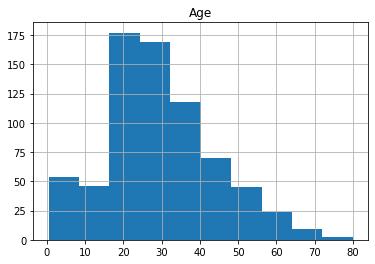

In [353]:
import matplotlib.pyplot as plt

df.hist(column='Age')

# Estimation par noyau gaussien
# df['Age'].plot.kde() 

On peut également définir des variables d'agrégation pour obtenir plusieurs graphiques.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a207f01d0>,
      dtype=object)

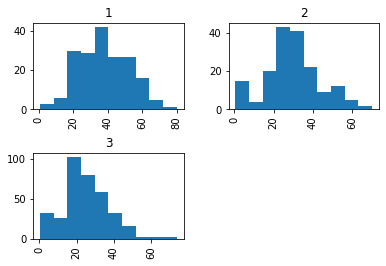

In [354]:
df.hist(column='Age', by='Pclass')

Et même faire des boîtes à moustaches ! 

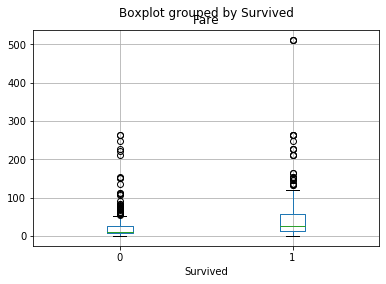

In [355]:
df.boxplot(column='Fare', by='Survived')

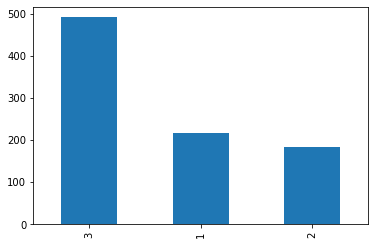

In [356]:
df['Pclass'].sort_values().value_counts().plot.bar()

#### Exercice

1. Dresser la distribution des âges des survivants au naufrage. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a211e5b38>]],
      dtype=object)

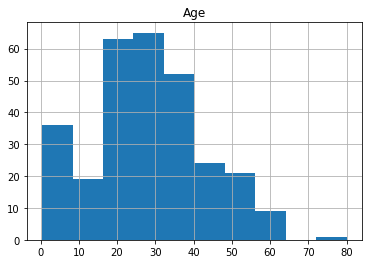

In [357]:
df.loc[df['Survived'] == 1, :].hist(column='Age')

2. Combien de passagers ont embarqué dans chacun des ports ? 

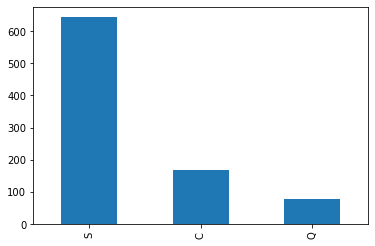

In [358]:
df['Embarked'].value_counts().plot.bar()

3. Quel est le prix moyen et l'écart-type d'un billet à bord du Titanic ? Dans chacune des classes ? Donner aussi le maximum et le minimum

Prix moyen:  32.2042079685746
Écart-type:  49.693428597180905
Min:  0.0
Max:  512.3292 

             Fare           
             mean        std
Pclass                      
1       84.154687  78.380373
2       20.662183  13.417399
3       13.675550  11.778142


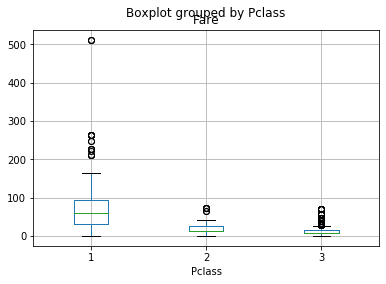

In [359]:
print("Prix moyen: ", df['Fare'].mean())
print("Écart-type: ", df['Fare'].std())
print("Min: ", df['Fare'].min())
print("Max: ", df['Fare'].max(),"\n")

g = df.groupby('Pclass')

print(g[['Fare']].agg([pd.Series.mean,pd.Series.std]))

df.boxplot(column='Fare', by='Pclass')

4. Quelles sont les proportions hommes/femmes avant et après le naufrage ? 

On visualisera ces proportions à l'aide d'un diagramme empilé produit grâce au code donné ci-dessous:

In [360]:
import matplotlib.ticker as mtick

def stackplot(df, groupVar) : 
    df.assign(dummy = 1).groupby(
      ['dummy',groupVar]
    ).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
    ).to_frame().unstack().plot(kind='bar',stacked=True,legend=True)

    # Pour ne pas imprimer la variable dummy
    plt.xlabel(groupVar)

    # Désactive l'axe des x
    plt.xticks([])

    _, correct_labels = plt.gca().get_legend_handles_labels()
    correct_labels = [t[t.index(', ') + 1:len(t)-1] for t in correct_labels]
    plt.legend(correct_labels)

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    plt.show()

Où `df` est le dataframe considéré et `groupVar` la variable de groupement dont les valeurs sont empilées. 

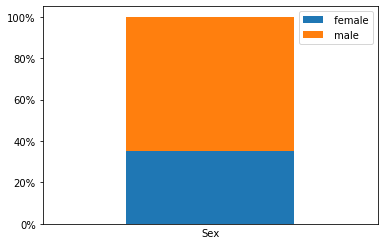

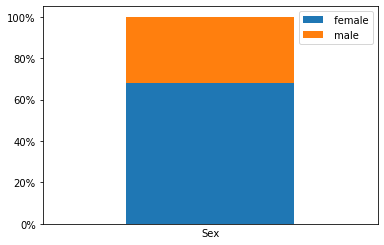

In [361]:
stackplot(df, 'Sex')
stackplot(df.loc[df['Survived'] == 1, :], 'Sex')

5. Donner le nombre de passagers dans chaque classe avant et après le naufrage. 

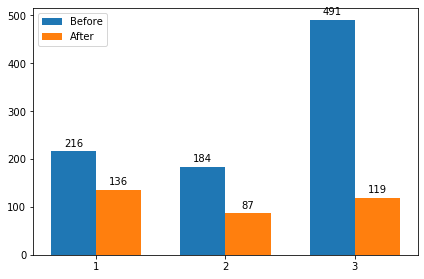

In [362]:
g = df.groupby('Pclass')

labels = [groupe[0] for groupe in g]
men_means = [df.loc[(df['Pclass']==groupe[0]), :].shape[0] for groupe in g]
women_means = [df.loc[(df['Pclass']==groupe[0]) & (df['Survived']==1), :].shape[0] for groupe in g]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Before')
rects2 = ax.bar(x + width/2, women_means, width, label='After')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Premières analyses bivariées <a class="anchor" id="2-3"></a>

Les précédentes analyses mises en place se sont concentrées sur l'étude de 1 variable à la fois. 

Les analyses bivariées étudient 2 variables conjointement. En fonction de leur nature (quantitative / qualitative), on utilisera différents moyens de visualisation (graphique à points, tableau de contingence, boîtes à moustaches). 

On commence par l'étude de deux variables quantitatives. Une étude classique effectuée est la recherche de corrélation entre ces deux variables ; nous reviendrons sur ces considérations plus en détails lors du cours de Statistiques avancées. 
Une méthode simple pour observer une corrélation entre variable et de visualiser le nuage de points correspondant et de regarder qui ceux-ci s'ajustent autour d'une droite. 

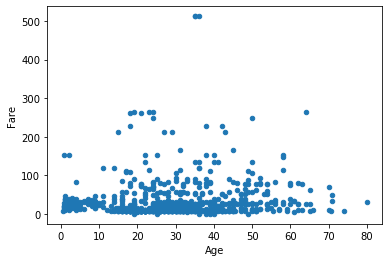

In [363]:
df.plot(kind="scatter",x="Age", y="Fare")

Ici, la corrélation entre les variable `Fare` et `Age` semble très faible, voire absente.

On peut ajouter également une couleur aux points pour plus d'information. Par exemple la variable `Survived`. 

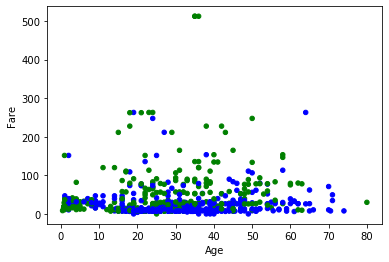

In [364]:
code_survie = df['Survived'].astype('int')

df.plot(kind="scatter", x="Age", y="Fare", c=pd.Series(['blue','green'])[code_survie])

Lorsque les points se chevauchent beaucoup, on peut utiliser un pavage de Kohonen.

On peut aussi régler les axes pour faire un zoom sur une portion du graphique à l'aide des commande `xlim` et `ylim`. 

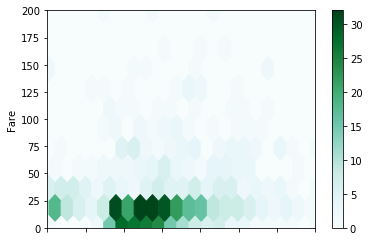

In [365]:
df.plot.hexbin(x="Age", y="Fare",xlim = [0, 70], ylim =[0, 200], gridsize=25)

Pour croiser deux variables quantitatives, on utilise les tables de contingence. 

In [366]:
table = pd.crosstab(df["Survived"],df["Pclass"])
print(table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Une telle table peut ensuite être visualisée à l'aide d'un diagramme mosaïque comme suit:

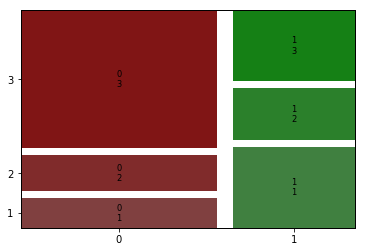

In [367]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df,["Survived","Pclass"], gap=0.05)
plt.show()

- La largeur d'une case donne la proportion de la variable en $X$ (ici 0 ou 1). 

- La hauteur d'une case donnent la proportion des modalités de $Y$ sachant les modalités de $X$. 

- La surface des cases de ce graphique donnent la proportion d'observation conjointe des modalités des variables $X$ et $Y$ considérées. 
